In [4]:
!pip install pandas numpy matplotlib scikit-learn statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt


In [6]:
# Step 1: Data Preprocessing
data = pd.read_csv(r"C:\Users\sunda\disease mentorness\MarketPricePrediction.csv")

In [17]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),1,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),1,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),1,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),1,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),1,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [18]:
data.tail()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
10222,YEOLA(MS),12,2011,131326,282,612,526,MS,YEOLA,2011-12-01
10223,YEOLA(MS),12,2012,207066,485,1327,1136,MS,YEOLA,2012-12-01
10224,YEOLA(MS),12,2013,215883,472,1427,1177,MS,YEOLA,2013-12-01
10225,YEOLA(MS),12,2014,201077,446,1654,1456,MS,YEOLA,2014-12-01
10226,YEOLA(MS),12,2015,223315,609,1446,1126,MS,YEOLA,2015-12-01


In [19]:
data.describe

<bound method NDFrame.describe of            market  month  year  quantity  priceMin  priceMax  priceMod state  \
0      ABOHAR(PB)      1  2005      2350       404       493       446    PB   
1      ABOHAR(PB)      1  2006       900       487       638       563    PB   
2      ABOHAR(PB)      1  2010       790      1283      1592      1460    PB   
3      ABOHAR(PB)      1  2011       245      3067      3750      3433    PB   
4      ABOHAR(PB)      1  2012      1035       523       686       605    PB   
...           ...    ...   ...       ...       ...       ...       ...   ...   
10222   YEOLA(MS)     12  2011    131326       282       612       526    MS   
10223   YEOLA(MS)     12  2012    207066       485      1327      1136    MS   
10224   YEOLA(MS)     12  2013    215883       472      1427      1177    MS   
10225   YEOLA(MS)     12  2014    201077       446      1654      1456    MS   
10226   YEOLA(MS)     12  2015    223315       609      1446      1126    MS   

     

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   market    10227 non-null  object        
 1   month     10227 non-null  int32         
 2   year      10227 non-null  int32         
 3   quantity  10227 non-null  int64         
 4   priceMin  10227 non-null  int64         
 5   priceMax  10227 non-null  int64         
 6   priceMod  10227 non-null  int64         
 7   state     10227 non-null  object        
 8   city      10227 non-null  object        
 9   date      10227 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(2), int64(4), object(3)
memory usage: 719.2+ KB


In [7]:
# Handling missing values
data.dropna(inplace=True)

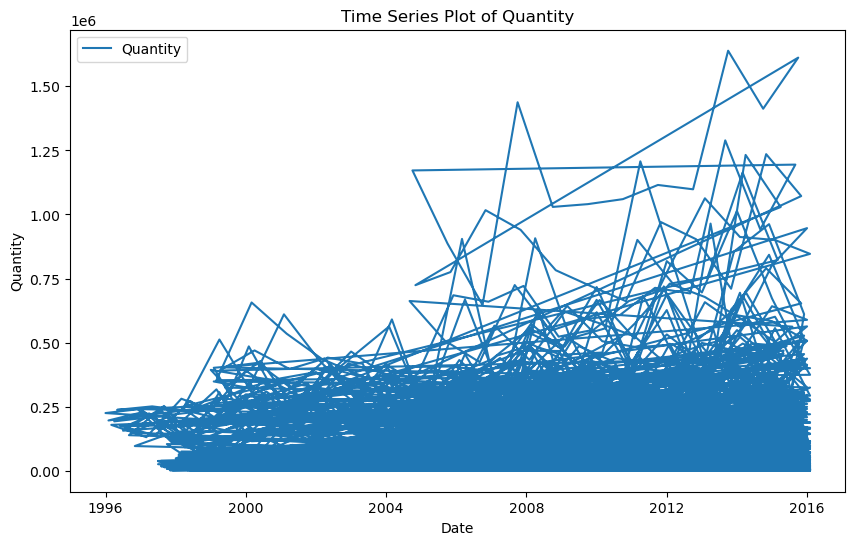

In [9]:
# Step 2: Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['quantity'], label='Quantity')
plt.title('Time Series Plot of Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

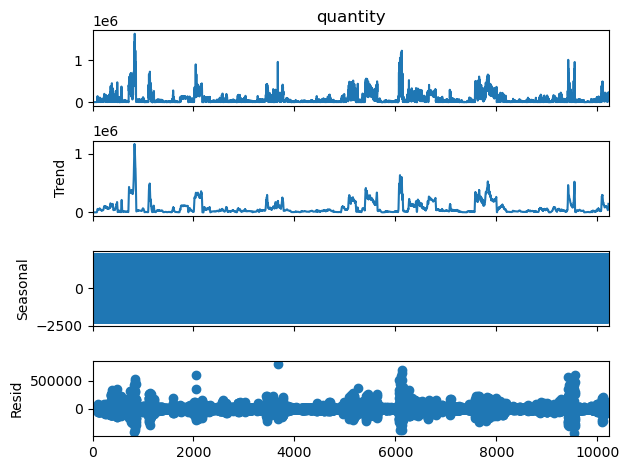

In [10]:
decomposition = seasonal_decompose(data['quantity'], model='additive', period=12)
decomposition.plot()
plt.show()


In [11]:
# Step 3: Feature Engineering
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

In [12]:
# Step 4: Model Selection and Training
# Using only ARIMA for simplicity
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]


In [13]:
arima_model = ARIMA(train['quantity'], order=(5,1,0))
arima_fit = arima_model.fit()


In [15]:
print("ARIMA RMSE:", sqrt(mean_squared_error(test['quantity'], test['arima_pred'])))


ARIMA RMSE: 85147.40606224275


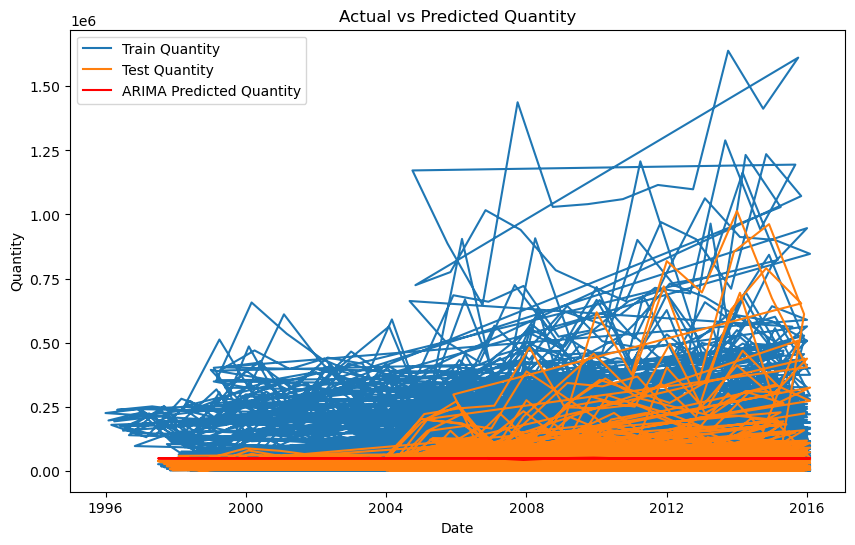

In [16]:
# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(train['date'], train['quantity'], label='Train Quantity')
plt.plot(test['date'], test['quantity'], label='Test Quantity')
plt.plot(test['date'], test['arima_pred'], label='ARIMA Predicted Quantity', color='red')
plt.title('Actual vs Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

In [21]:
import numpy as np
from sklearn.metrics import mean_squared_error


In [22]:
# Actual values
actual_values = np.array([404, 487, 1283, 3067, 523])  # Example actual values


In [23]:
# Predicted values
predicted_values = np.array([446, 563, 1460, 3433, 605])  # Example predicted values

In [ ]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
